In [72]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [73]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [74]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func
import datetime as dt #imported to calculate date 12 month ago

In [75]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [76]:
# Declare a Base using `automap_base()`
Base = automap_base()

In [77]:
# reflect an existing database into a new model
Base.prepare(engine, reflect=True)
# reflect the tables


In [78]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [79]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [80]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [81]:
first_row = session.query(Measurement).first()
first_row.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x1aa234ee9e8>,
 'prcp': 0.08,
 'station': 'USC00519397',
 'tobs': 65.0,
 'date': '2010-01-01',
 'id': 1}

In [82]:
first_row_station = session.query(Station).first()
first_row_station.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x1aa23763160>,
 'longitude': -157.8168,
 'name': 'WAIKIKI 717.2, HI US',
 'id': 1,
 'elevation': 3.0,
 'latitude': 21.2716,
 'station': 'USC00519397'}

# Exploratory Precipitation Analysis

In [83]:
# Find the most recent date in the data set.
recent_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first().date
recent_date

'2017-08-23'

<function matplotlib.pyplot.show(*args, **kw)>

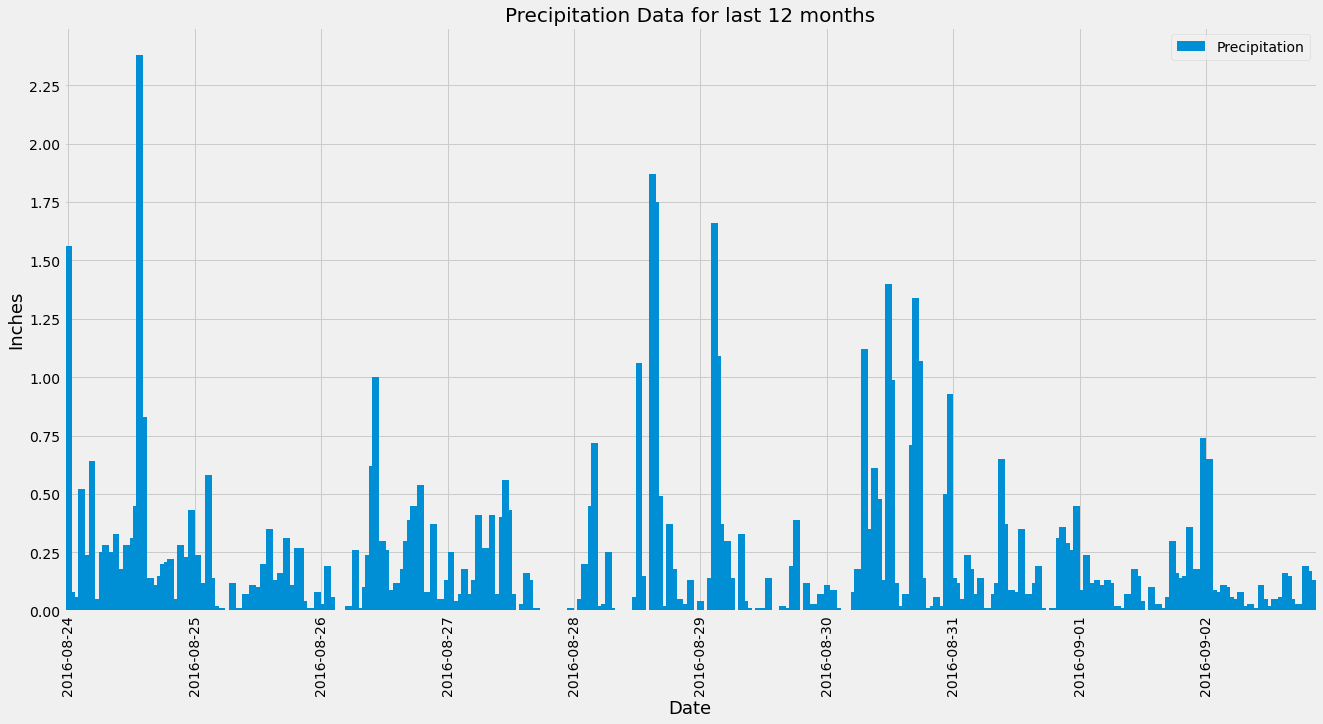

In [132]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
# Calculate the date one year from the last date in data set.
date_one_year = dt.datetime.strptime(recent_date, '%Y-%m-%d') - dt.timedelta(days=365) 


# Perform a query to retrieve the data and precipitation scores
precip_data = session.query(Measurement.date, func.round(func.avg(Measurement.prcp),2)).filter(Measurement.date >= date_one_year).group_by(Measurement.date).all()

# Save the query results as a Pandas DataFrame and set the index to the date column
precipitation_df = pd.DataFrame(precip_data, columns=['Date','Precipitation'])
precipitation_df.set_index('Date', inplace = True)
#precipitation_df.t()

# Sort the dataframe by date - Performed by the session query
# Use Pandas Plotting with Matplotlib to plot the data
ax = precipitation_df.plot(kind='bar', width=2, figsize=(20,10))
plt.locator_params(nbins = 10)
ax.grid(True)
plt.title("Precipitation Data for last 12 months", size=20)
plt.ylabel("Inches", size=18)
plt.xlabel("Date", size=18)
plt.savefig("Output/Precipitation.png")
plt.show

# Not able to figure out the ticks



# Exploratory Station Analysis

In [137]:
# Design a query to calculate the total number stations in the dataset
total_stations = session.query(func.count(Station.station)).all()
total_stations

[(9)]

In [142]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
count_stations = session.query(Measurement.station, func.count(Measurement.id)).group_by(Measurement.station).order_by(func.count(Measurement.id).desc()).all()
count_stations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [146]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
# Station USC00519281 is the most active station
temp_values = session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).filter(Measurement.station == 'USC00519281').all()
temp_values

[(54.0, 85.0, 71.66378066378067)]

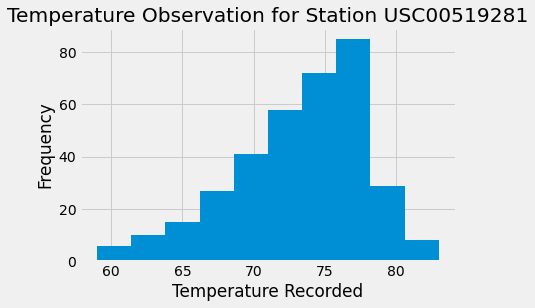

<Figure size 432x288 with 0 Axes>

In [151]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
# Station USC00519281 is the most active station with highest no.of observations

most_observation = session.query(Measurement.tobs, Measurement.station, Measurement.prcp, Measurement.date, Measurement.id). \
                    filter(Measurement.station == 'USC00519281'). \
                    filter(Measurement.date >= date_one_year).all()

#creating a panda dataframe to gather the data

USC00519281_df = pd.DataFrame(most_observation, columns=['Temperature','Station','Precipitation','Date','ID'])
USC00519281_df.set_index('ID', inplace = True)
#USC00519281_df.head()

#creating Histogram for the station USC00519281
plt.hist(USC00519281_df["Temperature"])
plt.xlabel('Temperature Recorded')
plt.ylabel('Frequency')
plt.title('Temperature Observation for Station USC00519281')
plt.show()
plt.savefig("Output/USC00519281_Temp_Obs.png")




# Close session

In [152]:
# Close Session
session.close()